In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
RANDOM_STATE = 42
from datetime import date

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
###Products

In [3]:
from scipy.stats import scoreatpercentile
from statsmodels.compat.pandas import Substitution
from statsmodels.sandbox.nonparametric import kernels

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [5]:
df_products = pd.read_csv('sociodemographic_df.csv')
df=pd.read_csv('df_banc_rev.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956511 entries, 0 to 5956510
Data columns (total 49 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Unnamed: 0                  int64  
 1   pk_cid                      int64  
 2   pk_partition                object 
 3   entry_date                  object 
 4   active_customer             float64
 5   entry_channel               int64  
 6   segment                     int64  
 7   short_term_deposit          int64  
 8   loans                       int64  
 9   mortgage                    int64  
 10  funds                       int64  
 11  securities                  int64  
 12  long_term_deposit           int64  
 13  credit_card                 int64  
 14  payroll                     float64
 15  pension_plan                float64
 16  payroll_account             int64  
 17  emc_account                 int64  
 18  debit_card                  int64  
 19  em_account_p         

In [7]:
revenue = df['revenue_total']
segment = df['segment']
ventastotal = df['unidades_vendidas_total']

In [8]:
df_products = pd.concat([df_products, revenue, segment, ventastotal], axis=1, join='inner')

In [9]:
df_products.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
pk_cid,1375586,1050611,1050612,1050613,1050614
pk_partition,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28
country_id,ES,ES,ES,ES,ES
region_code,29.00,13.00,13.00,50.00,50.00
gender,H,V,V,H,V
age,35,23,23,22,23
deceased,N,N,N,N,N
salary,"87,218.10","35,548.74","122,179.11","119,775.54",NaN
revenue_total,0.00,10.00,0.00,0.00,0.00


In [10]:
df_products.describe()

,Unnamed: 0,pk_cid,region_code,age,salary,revenue_total,segment,unidades_vendidas_total
count,"5,956,511.00","5,956,511.00","5,954,253.00","5,956,511.00","4,445,857.00","5,956,511.00","5,956,511.00","5,956,511.00"
mean,"7,148,439.06","1,235,001.29",25.81,29.76,"115,826.85",17.71,0.73,1.05
std,"3,917,106.28","162,374.65",13.59,11.98,"199,637.18",27.89,0.52,0.86
min,0.00,"15,891.00",1.00,2.00,"1,202.73",0.00,0.00,0.00
25%,"4,238,782.50","1,112,424.00",13.00,22.00,"61,504.50",10.00,0.00,1.00
50%,"7,496,139.00","1,231,394.00",28.00,25.00,"88,659.96",10.00,1.00,1.00
75%,"10,196,611.50","1,352,446.00",36.00,34.00,"131,674.56",10.00,1.00,1.00
max,"13,640,894.00","1,553,689.00",52.00,105.00,"28,894,395.51",320.00,2.00,9.00


In [11]:
df_products['revenue_total'].fillna(value='nada', inplace=True)
df_products['segment'].fillna(value='nada', inplace=True)
df_products['unidades_vendidas_total'].fillna(value='nada', inplace=True)
df_products['salary'].fillna(value='nada', inplace=True)
df_products['region_code'].fillna(value='nada', inplace=True)

In [12]:
df_products = df_products[df_products['revenue_total'] != 'nada']
df_products = df_products[df_products['segment'] != 'nada']
df_products = df_products[df_products['unidades_vendidas_total'] != 'nada']
df_products = df_products[df_products['salary'] != 'nada']
df_products = df_products[df_products['region_code'] != 'nada']

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [13]:
df_products['region_code'] = df_products['region_code'].astype(int)
df_products['salary'] = df_products['salary'].astype(int)
df_products['revenue_total'] = df_products['revenue_total'].astype(int)
df_products['unidades_vendidas_total'] = df_products['unidades_vendidas_total'].astype(int)

In [14]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4445820 entries, 0 to 5956510
Data columns (total 12 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Unnamed: 0               int64 
 1   pk_cid                   int64 
 2   pk_partition             object
 3   country_id               object
 4   region_code              int64 
 5   gender                   object
 6   age                      int64 
 7   deceased                 object
 8   salary                   int64 
 9   revenue_total            int64 
 10  segment                  int64 
 11  unidades_vendidas_total  int64 
dtypes: int64(8), object(4)
memory usage: 440.9+ MB


In [15]:
#df_products['unidades_vendidas_total'].value_counts()
#df_products['revenue_total'].value_counts()

In [16]:
df_products['age'].describe()

count   4,445,820.00
mean           29.96
std            12.01
min             2.00
25%            22.00
50%            25.00
75%            34.00
max           105.00
Name: age, dtype: float64

In [17]:
df_products.isnull().sum()

Unnamed: 0                  0
pk_cid                      0
pk_partition                0
country_id                  0
region_code                 0
gender                     25
age                         0
deceased                    0
salary                      0
revenue_total               0
segment                     0
unidades_vendidas_total     0
dtype: int64

In [18]:
reduce_df_products = ['region_code', 'salary', 'age', 'revenue_total', 'segment', 'unidades_vendidas_total']

In [19]:
reduce_df = df_products[reduce_df_products]

In [20]:
reduce_df.head(5).T

,0,1,2,3,5
region_code,29,13,13,50,45
salary,87218,35548,122179,119775,22220
age,35,23,23,22,23
revenue_total,0,10,0,0,0
segment,0,2,0,2,0
unidades_vendidas_total,0,1,0,0,0


In [21]:
reduce_df.describe()

,region_code,salary,age,revenue_total,segment,unidades_vendidas_total
count,"4,445,820.00","4,445,820.00","4,445,820.00","4,445,820.00","4,445,820.00","4,445,820.00"
mean,25.73,"115,825.86",29.96,17.99,0.73,1.06
std,13.61,"199,637.68",12.01,28.24,0.52,0.86
min,1.00,"1,202.00",2.00,0.00,0.00,0.00
25%,13.00,"61,504.00",22.00,10.00,0.00,1.00
50%,28.00,"88,659.00",25.00,10.00,1.00,1.00
75%,36.00,"131,674.00",34.00,10.00,1.00,1.00
max,52.00,"28,894,395.00",105.00,310.00,2.00,9.00


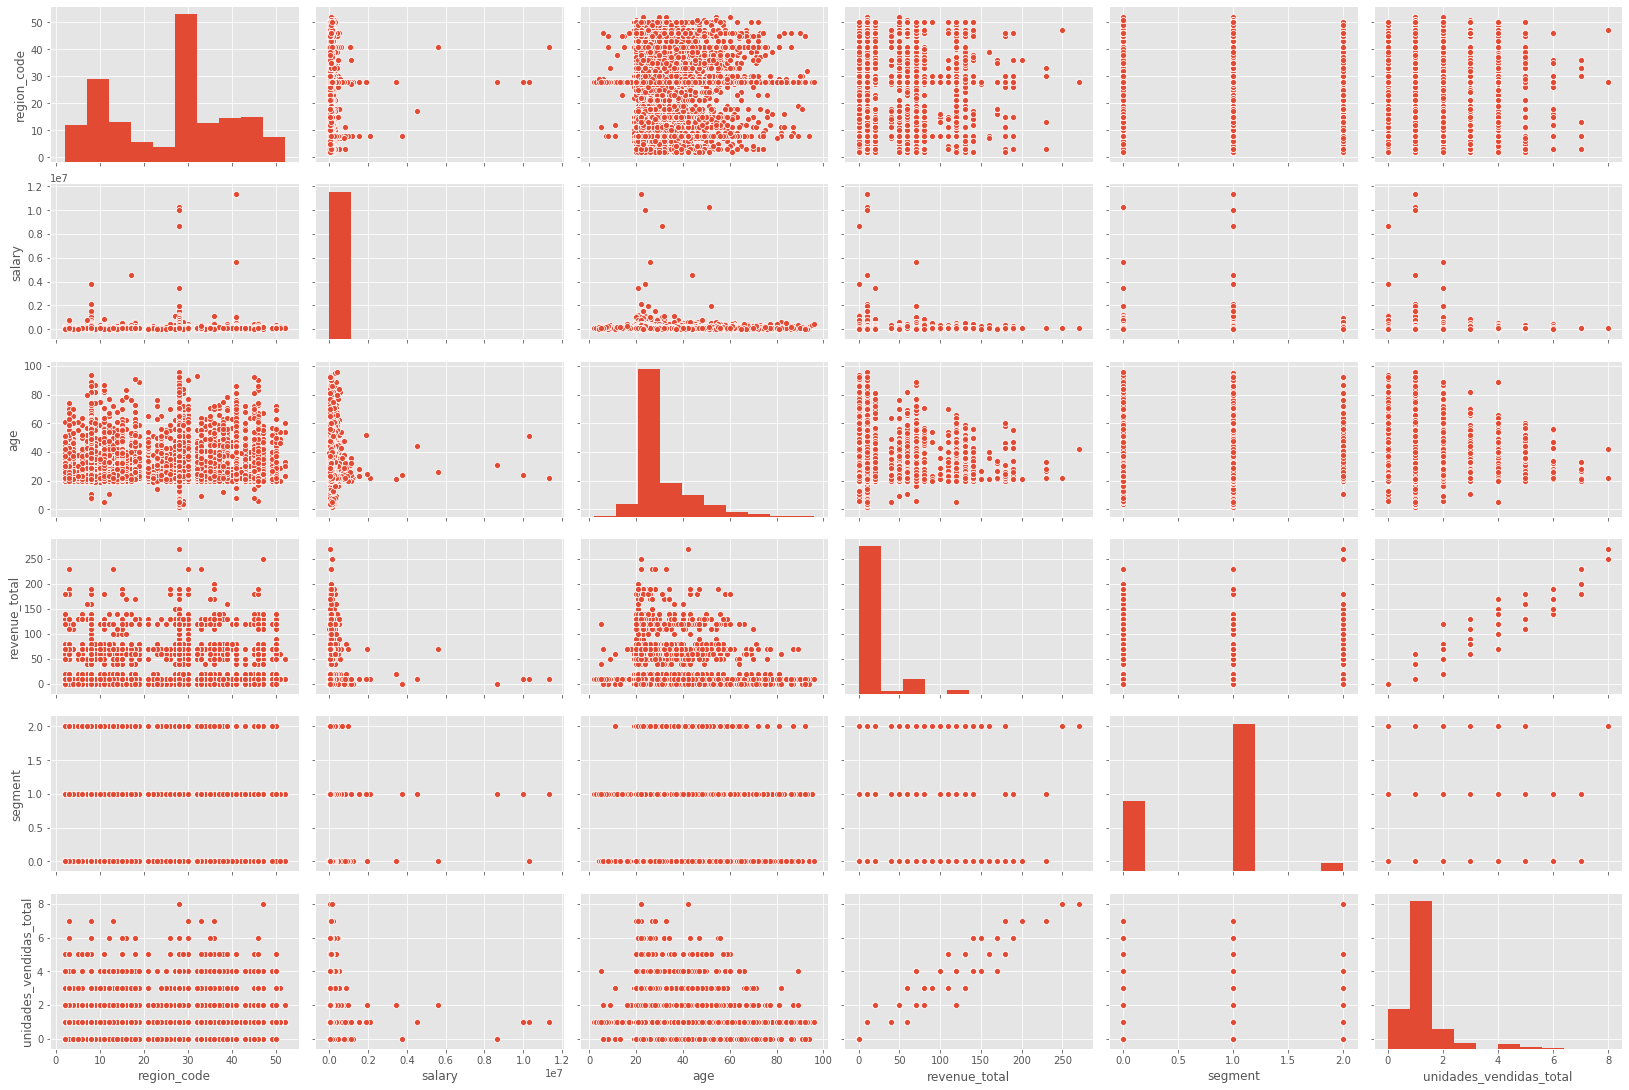

In [22]:
sns.pairplot(reduce_df.sample(10000), aspect=1.5)

In [23]:

reduce_df['region'] = pd.qcut(reduce_df['region_code'], q=6, labels=range(6))

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
reduce_df['salario'] = pd.qcut(reduce_df['salary'], q=20, labels=range(20))

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
reduce_df['edad'] = pd.qcut(reduce_df['age'], q=5, labels=range(5))

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
reduce_df['revenue'] = pd.qcut(reduce_df['revenue_total'], q=2, labels=range(2))

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
reduce_df['segmento'] = pd.qcut(reduce_df['segment'], q=2, labels=range(2))

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
reduce_df['unidades_vendidas'] = pd.qcut(reduce_df['unidades_vendidas_total'], q=2, labels=range(2))

In [29]:
reduce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4445820 entries, 0 to 5956510
Data columns (total 12 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   region_code              int64   
 1   salary                   int64   
 2   age                      int64   
 3   revenue_total            int64   
 4   segment                  int64   
 5   unidades_vendidas_total  int64   
 6   region                   category
 7   salario                  category
 8   edad                     category
 9   revenue                  category
 10  segmento                 category
 11  unidades_vendidas        category
dtypes: category(6), int64(6)
memory usage: 262.9 MB


In [30]:
cruce_table = pd.crosstab(reduce_df['revenue_total'], reduce_df['edad'])
cruce_table

edad,0,1,2,3,4
revenue_total,,,,,
0,232492,100946,163733,160749,151763
10,858983,364758,586997,590158,555587
20,24534,10481,16855,17176,16472
30,29,10,26,36,25
40,4949,2778,4094,3931,3641
50,15094,6897,10477,10789,10061
60,21617,9686,15397,15123,14442
70,78724,32114,51549,53323,50877
80,9731,4274,6639,6736,6210


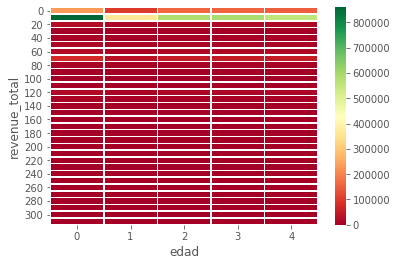

In [31]:
sns.heatmap(cruce_table, cmap='RdYlGn', linewidths=0.5)

In [32]:
cruce_table = pd.crosstab(reduce_df['segment'], reduce_df['edad'])
cruce_table

edad,0,1,2,3,4
segment,,,,,
0,398818,170181,272208,276766,264298
1,850763,355711,574139,575748,539930
2,40614,23388,37494,33935,31827


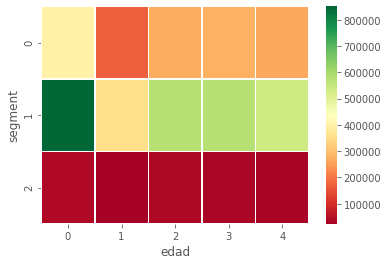

In [33]:
sns.heatmap(cruce_table, cmap='RdYlGn', linewidths=0.5)


In [34]:
cruce_table = pd.crosstab(reduce_df['unidades_vendidas_total'], reduce_df['region'])
cruce_table

region,0,1,2,3,4,5
unidades_vendidas_total,,,,,,
0,152131,127442,216126,63908,134581,115495
1,565168,473825,787806,236617,500630,427521
2,75147,63090,107455,31684,66847,56532
3,21244,18298,30474,9218,19592,16346
4,14692,12774,21813,6321,13594,11424
5,6124,5472,8689,2875,5789,4649
6,2072,1949,2991,942,2027,1733
7,423,359,546,189,380,326
8,75,65,137,30,84,58


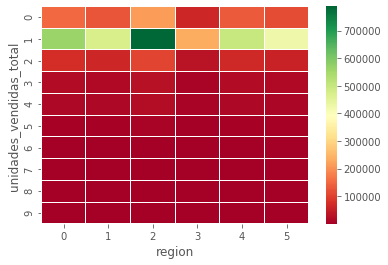

In [35]:
sns.heatmap(cruce_table, cmap='RdYlGn', linewidths=0.1)

In [59]:
########### HASTA ACA MOSTRAMOS DATOS

In [37]:
reduce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4445820 entries, 0 to 5956510
Data columns (total 12 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   region_code              int64   
 1   salary                   int64   
 2   age                      int64   
 3   revenue_total            int64   
 4   segment                  int64   
 5   unidades_vendidas_total  int64   
 6   region                   category
 7   salario                  category
 8   edad                     category
 9   revenue                  category
 10  segmento                 category
 11  unidades_vendidas        category
dtypes: category(6), int64(6)
memory usage: 262.9 MB


In [38]:
reduce_df.pivot_table(index='salario', values=['region_code'], aggfunc=[len, np.median])


,len,median
,region_code,region_code
salario,,
0,222291,27
1,222326,28
2,222265,28
3,222311,28
4,222293,28
5,222307,28
6,222309,28
7,222243,28


In [39]:
pipe = Pipeline(
        steps=[
            ('StandardScaler', StandardScaler()),
            ('KMeans', KMeans(n_clusters=8))
        ]
)

In [40]:
pipe.fit(reduce_df[['salary', 'region_code', 'age']])

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [41]:
Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)


Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [42]:
pipe

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
reduce_df['Cluster'] = pipe.predict(reduce_df[['salary', 'region_code', 'age']])

In [ ]:
reduce_df['Cluster']

In [ ]:
reduce_df.groupby('Cluster').agg({
    'salary': 'mean',
    'region_code': 'median',
    'age': 'mean'
})

In [ ]:

sns.pairplot(reduce_df.sample(50000), vars=['salary', 'region_code', 'age'], hue='Cluster', aspect=1.5)
plt.show()

In [ ]:
sse = {}
for k in range(1, 20):
    pipe = Pipeline(
            steps=[
                ('StandardScaler', StandardScaler()),
                ('KMeans', KMeans(n_clusters=k))
            ]
        ).fit(reduce_df.sample(50000)[['salary', 'region_code', 'age']])
    reduce_df.sample(50000)['Cluster'] = pipe['KMeans'].labels_
    sse[k] = pipe['KMeans'].inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [ ]:
#Selection of numerical variables for DBSCAN
Data_DBSCAN = reduce_df.sample(50000)[['salary', 'region_code', 'age']]

In [ ]:
nbrs=NearestNeighbors().fit(Data_DBSCAN)
distances, indices = nbrs.kneighbors(Data_DBSCAN,20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[range(len(kDis)-1,0,-1)]
plt.plot(range(0,len(kDis)),kDis)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.show()

In [ ]:

dbs_1= DBSCAN(eps=0.035, min_samples=4)
results = dbs_1.fit(Data_DBSCAN).labels_

In [ ]:
results

In [ ]:
#Visualize DBSCAN clustering 
df_DBSCAN=Data_DBSCAN
df_DBSCAN['Cluster'] = dbs_1.fit(Data_DBSCAN).labels_
print (df_DBSCAN['Cluster'].value_counts())
sns.pairplot(df_DBSCAN,hue='Cluster',palette='Dark2',diag_kind='kde')

In [ ]:
 #['region_code', 'salary', 'age']
 #   'unidades_vendidas_total'
 #   'revenue_total'
    ## ACA####

In [74]:
pipe = Pipeline(
        steps=[
            ('StandardScaler', StandardScaler()),
            ('KMeans', KMeans(n_clusters=8))
        ]
)

In [75]:
pipe.fit(reduce_df[['region_code', 'segment', 'revenue_total']])
#
Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)


Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [64]:
pipe

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [65]:
reduce_df['Cluster'] = pipe.predict(reduce_df[['region_code', 'segment', 'revenue_total']])
#
reduce_df.groupby('Cluster').agg({
    'region_code': 'mean',
    'segment': 'median',
    'revenue_total': 'mean'
})

,region_code,segment,revenue_total
Cluster,,,
0,25.84,1,67.31
1,44.07,1,8.56
2,29.05,1,8.47
3,25.87,0,67.14
4,34.66,0,7.26
5,10.27,0,7.64
6,9.77,1,8.56
7,25.83,0,136.07


In [67]:

#sns.pairplot(reduce_df.sample(50000), vars=['unidades_vendidas', 'region_code', 'revenue_total'], hue='Cluster', aspect=1.5)
#plt.show()

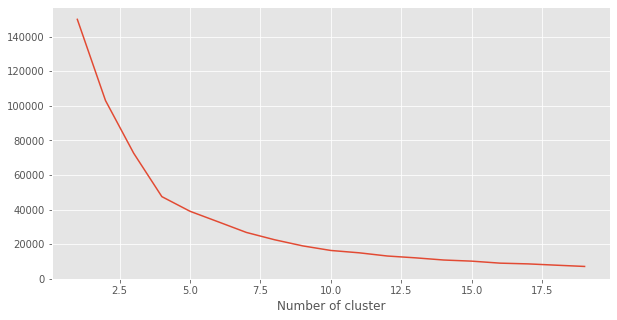

In [68]:
sse = {}
for k in range(1, 20):
    pipe = Pipeline(
            steps=[
                ('StandardScaler', StandardScaler()),
                ('KMeans', KMeans(n_clusters=k))
            ]
        ).fit(reduce_df.sample(50000)[['region_code', 'segment', 'revenue_total']])
    reduce_df.sample(50000)['Cluster'] = pipe['KMeans'].labels_
    sse[k] = pipe['KMeans'].inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [69]:
#Selection of numerical variables for DBSCAN
Data_DBSCAN = reduce_df.sample(50000)[['region_code', 'segment', 'revenue_total']]

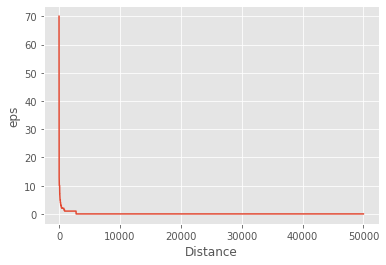

In [70]:
nbrs=NearestNeighbors().fit(Data_DBSCAN)
distances, indices = nbrs.kneighbors(Data_DBSCAN,20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[range(len(kDis)-1,0,-1)]
plt.plot(range(0,len(kDis)),kDis)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.show()

In [71]:

dbs_1= DBSCAN(eps=0.035, min_samples=4)
results = dbs_1.fit(Data_DBSCAN).labels_

5      5307
3      2842
24     1634
19     1459
1      1295
       ... 
628       4
488       4
44        4
76        4
639       4
Name: Cluster, Length: 651, dtype: int64


/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

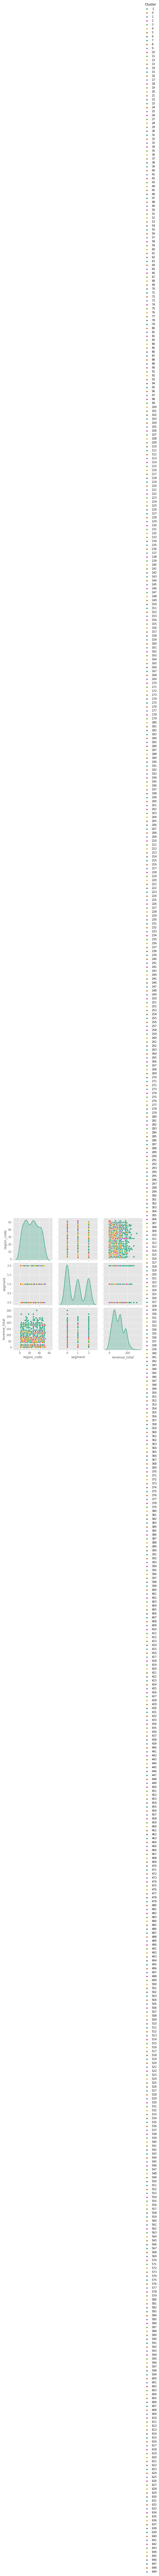

In [73]:
#Visualize DBSCAN clustering 
df_DBSCAN=Data_DBSCAN
df_DBSCAN['Cluster'] = dbs_1.fit(Data_DBSCAN).labels_
print (df_DBSCAN['Cluster'].value_counts())
sns.pairplot(df_DBSCAN,hue='Cluster',palette='Dark2',diag_kind='kde')

In [ ]:
########################################################

In [83]:
pipe = Pipeline(
        steps=[
            ('StandardScaler', StandardScaler()),
            ('KMeans', KMeans(n_clusters=8))
        ]
)

In [84]:
pipe.fit(reduce_df[['salary', 'segment', 'unidades_vendidas_total']])
Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)


Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [85]:
reduce_df['Cluster'] = pipe.predict(reduce_df[['region_code', 'segment', 'unidades_vendidas_total']])
reduce_df.groupby('Cluster').agg({
    'salary': 'mean',
    'segment': 'median',
    'unidades_vendidas_total': 'mean'
})

,salary,segment,unidades_vendidas_total
Cluster,,,
0,"115,455.44",1,1.04
1,"115,384.02",0,3.83
2,"116,541.90",0,1.31
5,"115,802.55",1,0.00
6,"116,307.84",0,0.00
7,"117,232.94",2,1.04


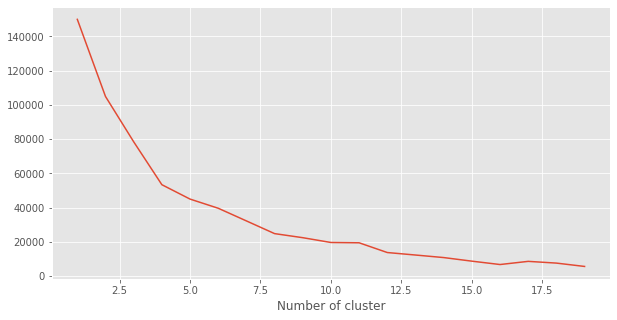

In [86]:
sse = {}
for k in range(1, 20):
    pipe = Pipeline(
            steps=[
                ('StandardScaler', StandardScaler()),
                ('KMeans', KMeans(n_clusters=k))
            ]
        ).fit(reduce_df.sample(50000)[['salary', 'segment', 'unidades_vendidas_total']])
    reduce_df.sample(50000)['Cluster'] = pipe['KMeans'].labels_
    sse[k] = pipe['KMeans'].inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [87]:
#Selection of numerical variables for DBSCAN
Data_DBSCAN = reduce_df.sample(50000)[['salary', 'segment', 'unidades_vendidas_total']]


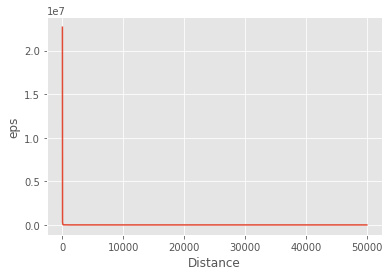

In [88]:
nbrs=NearestNeighbors().fit(Data_DBSCAN)
distances, indices = nbrs.kneighbors(Data_DBSCAN,20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[range(len(kDis)-1,0,-1)]
plt.plot(range(0,len(kDis)),kDis)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.show()

In [89]:
dbs_1= DBSCAN(eps=0.035, min_samples=4)
results = dbs_1.fit(Data_DBSCAN).labels_


-1     49844
 1         5
 9         5
 20        5
 11        5
 5         4
 10        4
 8         4
 7         4
 6         4
 37        4
 31        4
 4         4
 35        4
 3         4
 34        4
 2         4
 33        4
 32        4
 36        4
 13        4
 12        4
 14        4
 30        4
 29        4
 28        4
 27        4
 26        4
 25        4
 24        4
 23        4
 22        4
 21        4
 19        4
 18        4
 17        4
 16        4
 15        4
 0         4
Name: Cluster, dtype: int64


/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/giannimaggiora/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/User

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

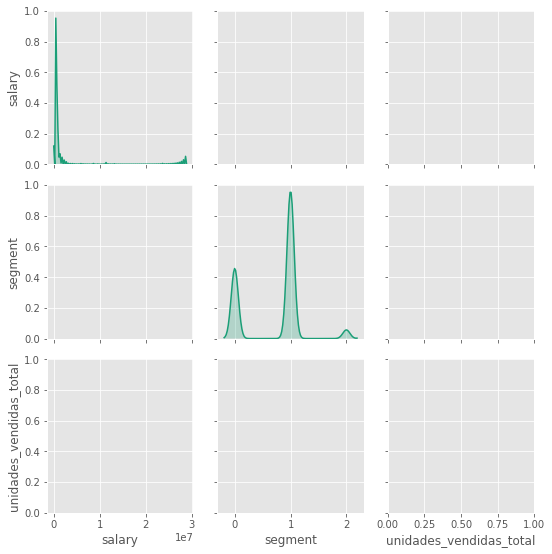

In [90]:
#Visualize DBSCAN clustering 
df_DBSCAN=Data_DBSCAN
df_DBSCAN['Cluster'] = dbs_1.fit(Data_DBSCAN).labels_
print (df_DBSCAN['Cluster'].value_counts())
sns.pairplot(df_DBSCAN,hue='Cluster',palette='Dark2',diag_kind='kde')


In [ ]:
##
##Métodos de matplotlib que se reutilizan en seaborn
plt.figure()
plt.title()
plt.legend()
plt.show()

In [ ]:
Configuración de estilos
La librería seaborn permite personalizar el estilo del gráfico, la paleta de colores que se utiliza, la fuente y el tamaño de los diferentes integrantes de la visualización, así como definir un contexto en el que se va a utilizar el gráfico para adaptar el tamaño.
sns.set_style()
sns.set_palette()
sns.set_context()